In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
!pip install chardet


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import chardet

# Baca beberapa byte pertama dari file untuk deteksi
with open('../data/data.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))  # Baca 10KB pertama
    print(result)

# Misalnya hasil: {'encoding': 'ISO-8859-1', 'confidence': 0.73}
df = pd.read_csv('../data/data.csv', index_col=0, encoding=result['encoding'])


df.head()  # Tampilkan beberapa baris pertama dari DataFrame


{'encoding': 'ISO-8859-1', 'confidence': 0.728467, 'language': ''}


,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
Tweet,,,,,,,,,,,,
- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !',1,1,1,0,0,0,0,0,1,1,0,0
RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga',0,1,0,0,0,0,0,0,0,0,0,0
"41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter",0,0,0,0,0,0,0,0,0,0,0,0
USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU',0,0,0,0,0,0,0,0,0,0,0,0
USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah',1,1,0,1,1,0,0,0,0,0,1,0


In [17]:

# Ringkasan data
print("Ringkasan Dataset:")
print(df.info())


Ringkasan Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 13169 entries, - disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !' to USER Mana situ ngasih(": itu cuma foto ya kutil onta'
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   HS             13169 non-null  int64
 1   Abusive        13169 non-null  int64
 2   HS_Individual  13169 non-null  int64
 3   HS_Group       13169 non-null  int64
 4   HS_Religion    13169 non-null  int64
 5   HS_Race        13169 non-null  int64
 6   HS_Physical    13169 non-null  int64
 7   HS_Gender      13169 non-null  int64
 8   HS_Other       13169 non-null  int64
 9   HS_Weak        13169 non-null  int64
 10  HS_Moderate    13169 non-null  int64
 11  HS_Strong      13169 non-null  int64
dtypes: int64(12)
memory usage: 1.3+ MB
None


In [18]:

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())



Statistik Deskriptif:
                 HS       Abusive  HS_Individual      HS_Group   HS_Religion  \
count  13169.000000  13169.000000   13169.000000  13169.000000  13169.000000   
mean       0.422280      0.382945       0.271471      0.150809      0.060217   
std        0.493941      0.486123       0.444735      0.357876      0.237898   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000      0.000000   
75%        1.000000      1.000000       1.000000      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

            HS_Race   HS_Physical     HS_Gender      HS_Other       HS_Weak  \
count  13169.000000  13169.000000  13169.000000  13169.000000  13169.000000   
mean       0.042980      0.024527      0.023236      0.284000      0.256891   
std        0.202819

In [19]:

# Distribusi label utama (HS dan Abusive)
print("\nDistribusi HS dan Abusive:")
print(df[['HS', 'Abusive']].value_counts())



Distribusi HS dan Abusive:
HS  Abusive
0   0          5860
1   1          3295
    0          2266
0   1          1748
Name: count, dtype: int64


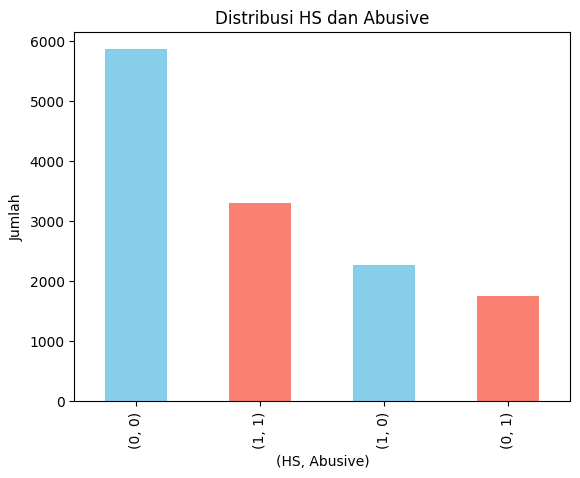

In [20]:

# Visualisasi distribusi HS dan Abusive
df[['HS', 'Abusive']].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi HS dan Abusive')
plt.xlabel('(HS, Abusive)')
plt.ylabel('Jumlah')
plt.show()


In [21]:

# Distribusi kategori HS
hs_columns = [
    'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
    'HS_Physical', 'HS_Gender', 'HS_Other',
    'HS_Weak', 'HS_Moderate', 'HS_Strong'
]

# Hitung distribusi
hs_category_counts = df[hs_columns].sum().sort_values(ascending=False)

# Tampilkan distribusi
print("\nDistribusi Kategori HS:")
print(hs_category_counts)



Distribusi Kategori HS:
HS_Other         3740
HS_Individual    3575
HS_Weak          3383
HS_Group         1986
HS_Moderate      1705
HS_Religion       793
HS_Race           566
HS_Strong         473
HS_Physical       323
HS_Gender         306
dtype: int64


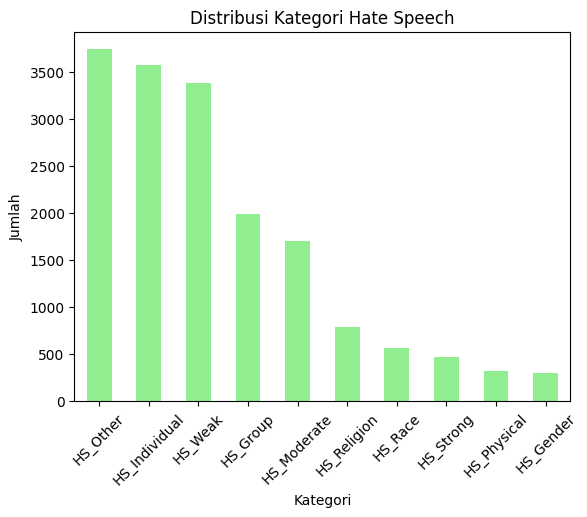

In [22]:

# Visualisasi distribusi kategori HS
hs_category_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribusi Kategori Hate Speech')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()